# Historical emissions across subnets

On this notebook, you can find code to get information on the share of emissions subnets receive. 

In [1]:
import bittensor as bt
import torch
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.relativedelta import relativedelta
from substrateinterface import SubstrateInterface

/Users/gustave/miniconda3/envs/bittensor/lib/python3.10/site-packages/eth_utils/network.py:44: UserWarning: Network 345 with name 'Yooldo Verse Mainnet' does not have a valid ChainId. eth-typing should be updated with the latest networks.
  warnings.warn(
/Users/gustave/miniconda3/envs/bittensor/lib/python3.10/site-packages/eth_utils/network.py:44: UserWarning: Network 12611 with name 'Astar zkEVM' does not have a valid ChainId. eth-typing should be updated with the latest networks.
  warnings.warn(


In [2]:
subtensor = bt.subtensor('archive')
substrate = SubstrateInterface(url="wss://archive.chain.opentensor.ai:443/")

## Weekly data for all subnets
*Update: I changed the code to get the daily data over the past week* <br>
Parameters to change: 
- first param of the blocks range
- relativedelta param for start_date

In [3]:
block = substrate.get_block()['header']['number']
print(block)
# get latest block
# essai sur 4 mois, avec 6000 blocks/j, 1semaine = 42000 blocks
blocks_per_week = 7200*7
blocks = range(block - blocks_per_week*4, block, 7200)
#jour block 2735000: 10 avril
# find block timestamp
today = datetime.today().date()
start_date = (today - relativedelta(weeks=4))
days_since_start = 0
print(block, blocks)

3161450
3161450 range(2959850, 3161450, 7200)


In [4]:
emissions_data_top10 = {}
emissions_data_bottom10 = {}
emissions_data_middle = {}

# to change every time I run it
top10_subnets = [0, 19, 18, 9, 8, 1, 5, 21, 2, 22]
bottom10_subnets = [6, 16, 34, 25, 33, 14, 4, 29, 11, 26]
middle_subnets= [value for value in range(0, 35) if value not in set(top10_subnets + bottom10_subnets)]

for block in blocks:
    top10_subnets_emissions = {}
    bottom10_subnets_emissions = {}
    middle_subnets_emissions = {}

    date = (start_date + relativedelta(days=days_since_start)).strftime('%Y-%m-%d')
    days_since_start += 1
    print(block, date)

    for i in top10_subnets:
        top10_subnets_emissions[i]= float(subtensor.get_emission_value_by_subnet(i, block))
    emissions_data_top10[date] = top10_subnets_emissions

    
    for i in bottom10_subnets:
        bottom10_subnets_emissions[i]= float(subtensor.get_emission_value_by_subnet(i, block))
    emissions_data_bottom10[date] = bottom10_subnets_emissions

    
    for i in middle_subnets:
        middle_subnets_emissions[i]= float(subtensor.get_emission_value_by_subnet(i, block))
    emissions_data_middle[date] = middle_subnets_emissions

emissions_data_top10 = pd.DataFrame(emissions_data_top10).T
emissions_data_bottom10 = pd.DataFrame(emissions_data_bottom10).T
emissions_data_middle = pd.DataFrame(emissions_data_middle).T

2959850 2024-05-15
2967050 2024-05-16
2974250 2024-05-17
2981450 2024-05-18
2988650 2024-05-19
2995850 2024-05-20
3003050 2024-05-21
3010250 2024-05-22
3017450 2024-05-23
3024650 2024-05-24
3031850 2024-05-25
3039050 2024-05-26
3046250 2024-05-27
3053450 2024-05-28
3060650 2024-05-29
3067850 2024-05-30
3075050 2024-05-31
3082250 2024-06-01
3089450 2024-06-02
3096650 2024-06-03
3103850 2024-06-04
3111050 2024-06-05
3118250 2024-06-06
3125450 2024-06-07
3132650 2024-06-08
3139850 2024-06-09
3147050 2024-06-10
3154250 2024-06-11


In [5]:
print(emissions_data_top10.iloc[-1].sum())
print(emissions_data_middle.iloc[-1].sum())
print(emissions_data_bottom10.iloc[-1].sum())

0.6418197170000001
0.30677972800000003
0.05072227800000001


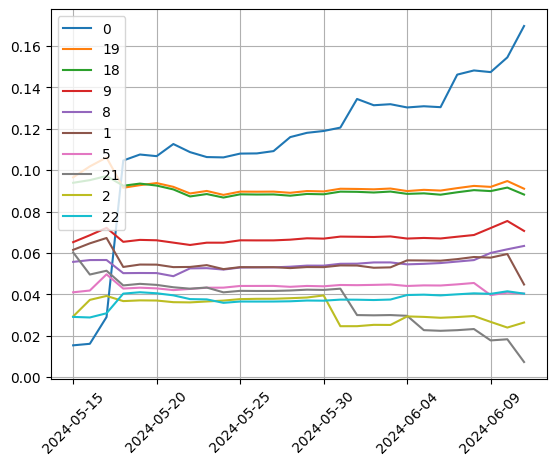

In [10]:
emissions_data_top10.plot(kind='line')
plt.xticks(rotation=45)
plt.grid()
plt.show()

## Daily emissions data for one subnet

In [7]:
block = substrate.get_block()['header']['number']
print(block)

# blocks
blocks_per_day = 7200
period = 50
blocks = range(block - blocks_per_day*period, block + blocks_per_day, blocks_per_day)

# today date
today = datetime.today().date()
start_date = (today - relativedelta(days=period))
days_since_start = 0
print(blocks)

3161469
range(2801469, 3168669, 7200)


In [8]:
emissions_data = {}

for block in blocks:
    subnet_emissions_1 = {}

    date = (start_date + relativedelta(days=days_since_start)).strftime('%m-%d')
    days_since_start += 1
    print(block, date)

    emissions = float(subtensor.get_emission_value_by_subnet(2, block))
    emissions_data[date] = emissions

index = pd.date_range(start=start_date, periods=days_since_start, freq='D')
emissions_df = pd.DataFrame(emissions_data, index=index).T

2801469 04-23
2808669 04-24
2815869 04-25
2823069 04-26
2830269 04-27
2837469 04-28
2844669 04-29
2851869 04-30
2859069 05-01
2866269 05-02
2873469 05-03
2880669 05-04
2887869 05-05
2895069 05-06
2902269 05-07
2909469 05-08
2916669 05-09
2923869 05-10
2931069 05-11
2938269 05-12
2945469 05-13
2952669 05-14
2959869 05-15
2967069 05-16
2974269 05-17
2981469 05-18
2988669 05-19
2995869 05-20
3003069 05-21
3010269 05-22
3017469 05-23
3024669 05-24
3031869 05-25
3039069 05-26
3046269 05-27
3053469 05-28
3060669 05-29
3067869 05-30
3075069 05-31
3082269 06-01
3089469 06-02
3096669 06-03
3103869 06-04
3111069 06-05
3118269 06-06
3125469 06-07
3132669 06-08
3139869 06-09
3147069 06-10
3154269 06-11
3161469 06-12


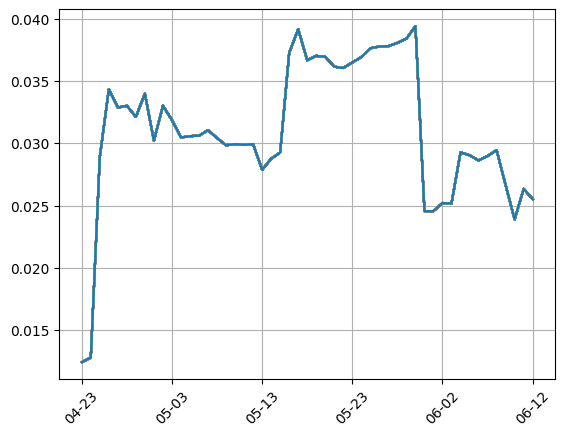

In [9]:
emissions_df.plot(kind='line')
plt.xticks(rotation=45)
plt.grid()
plt.legend().remove()
plt.show()